# Add Require Libraries


In [44]:
import pandas as pd
import numpy as np

import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

#for checking accuracy score & confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt     
#import scikitplot as skplt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Add Dataset

In [45]:
News = pd.read_csv('dataset.csv',encoding='latin-1')
News

,news,type
0,China had role in Yukos split-up\n \n China le...,business
1,Oil rebounds from weather effect\n \n Oil pric...,business
2,Indonesia 'declines debt freeze'\n \n Indonesi...,business
3,$1m payoff for former Shell boss\n \n Shell is...,business
4,US bank in $515m SEC settlement\n \n Five Bank...,business
5,Verizon 'seals takeover of MCI'\n \n Verizon h...,business
6,"Parmalat boasts doubled profits\n \n Parmalat,...",business
7,US seeks new $280bn smoker ruling\n \n The US ...,business
8,"Steel firm 'to cut' 45,000 jobs\n \n Mittal St...",business
9,Cars pull down US retail figures\n \n US retai...,business


In [46]:
y=pd.read_csv('dataset.csv',encoding='latin-1',header=None,usecols=range(1,2),skiprows=1)
y=np.array(y)
y

array([['business'],
       ['business'],
       ['business'],
       ...,
       ['tech'],
       ['tech'],
       ['tech']], dtype=object)

In [47]:
News['type'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

(-1.1181772483070935,
 1.1008655832527188,
 -1.1143290232754486,
 1.124527949314561)

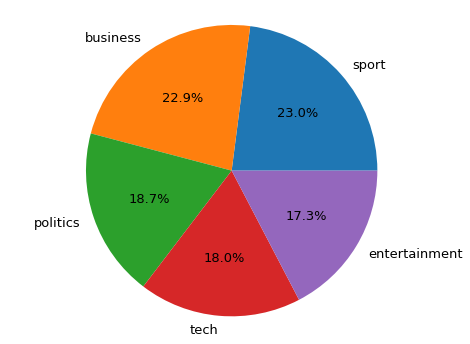

In [48]:
News.type.value_counts().plot(kind='pie', 
                                  figsize=(8,6), 
                                  fontsize=13, 
                                  autopct='%1.1f%%', 
                                  wedgeprops={'linewidth': 5}
                                  )
plt.axis('off')
plt.axis('equal')

In [49]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)
y

C:\Users\DELL\Anaconda3\envs\tt\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\envs\tt\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 4, 4, 4])

# Data Pre_processing


In [50]:
#Tokenization: NLTK Library has word_tokenize and sent_tokenize to easily break a stream of text into a list of words or sentences
#Word Stemming/Lemmatization: The aim of both processes is the same, reducing the inflectional forms of each word into a common base or root

# Step - a :Remove blank rows if any.
News['news'].dropna(inplace=True)

In [51]:
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently


News['news'] = [entry.lower() for entry in News['news']]

In [52]:
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words

News['news']= [word_tokenize(entry) for entry in News['news']]

In [53]:
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(News['news']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    News.loc[index,'text_final'] = str(Final_words)
#News.loc[index,'text_final']

In [54]:
News

,news,type,text_final
0,"[china, had, role, in, yukos, split-up, china,...",business,"['china', 'role', 'yukos', 'china', 'lent', 'r..."
1,"[oil, rebounds, from, weather, effect, oil, pr...",business,"['oil', 'rebound', 'weather', 'effect', 'oil',..."
2,"[indonesia, 'declines, debt, freeze', indonesi...",business,"['indonesia', 'debt', 'indonesia', 'longer', '..."
3,"[$, 1m, payoff, for, former, shell, boss, shel...",business,"['payoff', 'former', 'shell', 'bos', 'shell', ..."
4,"[us, bank, in, $, 515m, sec, settlement, five,...",business,"['u', 'bank', 'sec', 'settlement', 'five', 'ba..."
5,"[verizon, 'seals, takeover, of, mci', verizon,...",business,"['verizon', 'takeover', 'verizon', 'takeover',..."
6,"[parmalat, boasts, doubled, profits, parmalat,...",business,"['parmalat', 'boast', 'double', 'profit', 'par..."
7,"[us, seeks, new, $, 280bn, smoker, ruling, the...",business,"['u', 'seek', 'new', 'smoker', 'rule', 'u', 'j..."
8,"[steel, firm, 'to, cut, ', 45,000, jobs, mitta...",business,"['steel', 'firm', 'cut', 'job', 'mittal', 'ste..."
9,"[cars, pull, down, us, retail, figures, us, re...",business,"['car', 'pull', 'u', 'retail', 'figure', 'u', ..."


# Prepare Train and Test Data sets


In [55]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(News['text_final'],News['type'],test_size=0.3)
Train_X60, Test_X60, Train_Y60, Test_Y60 = model_selection.train_test_split(News['text_final'],News['type'],test_size=0.4)
Train_X80, Test_X80, Train_Y80, Test_Y80 = model_selection.train_test_split(News['text_final'],News['type'],test_size=0.2)
Train_X90, Test_X90, Train_Y90, Test_Y90 = model_selection.train_test_split(News['text_final'],News['type'],test_size=0.1)

# Encoding

In [56]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
#Test_Y
#print(Train_Y)
Train_Y60 = Encoder.fit_transform(Train_Y60)
Test_Y60 = Encoder.fit_transform(Test_Y60)

Train_Y80 = Encoder.fit_transform(Train_Y80)
Test_Y80 = Encoder.fit_transform(Test_Y80)

Train_Y90 = Encoder.fit_transform(Train_Y90)
Test_Y90 = Encoder.fit_transform(Test_Y90)

In [57]:
Tfidf_vect = TfidfVectorizer(max_features=21882) #(max_features=5000) Their will be maximum of 5000 unique words/features as we have set parameter max_features=5000
Tfidf_vect.fit(News['text_final'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

Train_X_Tfidf60 = Tfidf_vect.transform(Train_X60)
Test_X_Tfidf60 = Tfidf_vect.transform(Test_X60)

Train_X_Tfidf80 = Tfidf_vect.transform(Train_X80)
Test_X_Tfidf80 = Tfidf_vect.transform(Test_X80)

Train_X_Tfidf90 = Tfidf_vect.transform(Train_X90)
Test_X_Tfidf90 = Tfidf_vect.transform(Test_X90)

In [58]:
#print(Tfidf_vect.vocabulary_)

In [61]:
#each row a list of unique integer number and its associated importance as calculated by TF-IDF

#print(Train_X_Tfidf)
# Output: — 1: Row number of ‘Train_X_Tfidf’, 
#           2: Unique Integer number of each word in the first row, 
#           3: Score calculated by TF-IDF Vectorizer

In [62]:
print(Test_X_Tfidf.shape)

(668, 21882)


In [63]:
print(Train_X_Tfidf.shape)

(1557, 21882)


# Use the ML Algorithms Naive Bayes to Predict the outcome


In [64]:
 # fit the training dataset on the NB classifier
   
    
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)

Naive.fit(Train_X_Tfidf60,Train_Y60)
# predict the labels on validation dataset
predictions_NB60 = Naive.predict(Test_X_Tfidf60)

Naive.fit(Train_X_Tfidf80,Train_Y80)
# predict the labels on validation dataset
predictions_NB80 = Naive.predict(Test_X_Tfidf80)

Naive.fit(Train_X_Tfidf90,Train_Y90)
# predict the labels on validation dataset
predictions_NB90 = Naive.predict(Test_X_Tfidf90)

# Use accuracy_score function to get the accuracy
print("Accuracy Score of training 60% and testing 40%    ",accuracy_score(predictions_NB60, Test_Y60)*100)
print("Recall Score of training 60% and testing 40%      ",recall_score(predictions_NB60, Test_Y60, average="macro")*100)
print("Precision Score of training 60% and testing 40%   ",precision_score(predictions_NB60, Test_Y60, average="macro")*100)
print("F1 Score of training 60% and testing 40%          ",f1_score(predictions_NB60, Test_Y60, average="macro")*100)
print("\n\n")

print("Accuracy Score of training 70% and testing 30%    ",accuracy_score(predictions_NB, Test_Y)*100)
print("Recall Score of training 70% and testing 30%      ",recall_score(predictions_NB, Test_Y, average="macro")*100)
print("Precision Score of training 70% and testing 30%   ",precision_score(predictions_NB, Test_Y, average="macro")*100)
print("F1 Score of training 70% and testing 30%          ",f1_score(predictions_NB, Test_Y, average="macro")*100)
print("\n\n")

print("Accuracy Score of training 80% and testing 20%    ",accuracy_score(predictions_NB80, Test_Y80)*100)
print("Recall Score of training 80% and testing 20%      ",recall_score(predictions_NB80, Test_Y80, average="macro")*100)
print("Precision Score of training 80% and testing 20%   ",precision_score(predictions_NB80, Test_Y80, average="macro")*100)
print("F1 Score of training 80% and testing 20%          ",f1_score(predictions_NB80, Test_Y80, average="macro")*100)
print("\n\n")

print("Accuracy Score of training 90% and testing 10%    ",accuracy_score(predictions_NB90, Test_Y90)*100)
print("Recall Score of training 90% and testing 10%      ",recall_score(predictions_NB90, Test_Y90, average="macro")*100)
print("Precision Score of training 90% and testing 10%   ",precision_score(predictions_NB90, Test_Y90, average="macro")*100)
print("F1 Score of training 90% and testing 10%          ",f1_score(predictions_NB90, Test_Y90, average="macro")*100)
print("\n\n")
#predictions_NB


a =accuracy_score(predictions_NB, Test_Y)*100
b =recall_score(predictions_NB, Test_Y, average="macro")*100
c =precision_score(predictions_NB, Test_Y, average="macro")*100
d =f1_score(predictions_NB, Test_Y, average="macro")*100


Accuracy Score of training 60% and testing 40%     96.29213483146067
Recall Score of training 60% and testing 40%       96.36107974680212
Precision Score of training 60% and testing 40%    95.89320191508962
F1 Score of training 60% and testing 40%           96.04952101697407



Accuracy Score of training 70% and testing 30%     96.25748502994011
Recall Score of training 70% and testing 30%       96.32518186148408
Precision Score of training 70% and testing 30%    96.05058237919326
F1 Score of training 70% and testing 30%           96.14563237109301



Accuracy Score of training 80% and testing 20%     96.85393258426967
Recall Score of training 80% and testing 20%       96.70269380625368
Precision Score of training 80% and testing 20%    96.84522103269066
F1 Score of training 80% and testing 20%           96.73193529033945



Accuracy Score of training 90% and testing 10%     95.06726457399103
Recall Score of training 90% and testing 10%       94.70179424076062
Precision Score of traini

# Compare Naive Bayes with SVM


In [65]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
#print("Naive Bayes Recall Score -> ",recall_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  97.30538922155688


# Predicting train and test samples

In [66]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(Train_X_Tfidf,Train_Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [67]:
y_train_predict = clf.predict(Train_X_Tfidf)
y_test_predict = clf.predict(Test_X_Tfidf)

In [68]:
#testing the accuracy score of train and test data
train_accuracy = accuracy_score(Train_Y,y_train_predict)
test_accuracy = accuracy_score(Test_Y,y_test_predict)

print((train_accuracy)*100)
print((test_accuracy)*100)

99.03660886319847
96.25748502994011


In [69]:
#testing the confusion matrix of train and test data

print(confusion_matrix(Train_Y,y_train_predict))
print('_______________________________\n')
print(confusion_matrix(Test_Y,y_test_predict))

[[351   0   2   0   2]
 [  0 263   5   0   2]
 [  1   0 291   0   2]
 [  0   0   0 352   0]
 [  0   1   0   0 285]]
_______________________________

[[148   0   4   0   3]
 [  3 107   4   1   1]
 [  2   0 121   0   0]
 [  1   0   0 158   0]
 [  1   1   1   3 109]]


# 3D Confusion Metrix

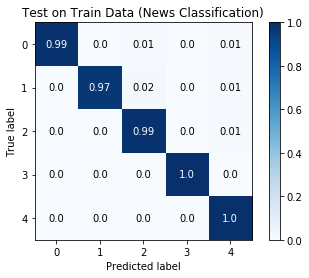

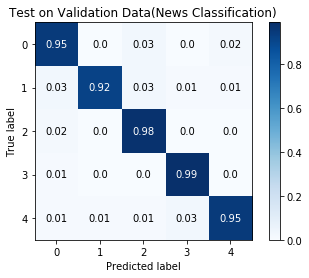

In [70]:
#(4) Accuracy measure & Plot  (Confusion Matrix)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Train_Y, y_train_predict,
                                    title = "Test on Train Data (News Classification)",  
                                    normalize=True)                         #pip install scikit-plot
skplt.metrics.plot_confusion_matrix(Test_Y, y_test_predict,title ="Test on Validation Data(News Classification)", normalize=True)

In [71]:
from sklearn.model_selection import train_test_split


def TrainTestSplit():
        dataset = pd.read_csv('dataset.csv',encoding='latin-1')
        
        x = dataset.iloc[:, :-1].values
        y = dataset.iloc[:, 1].values
        
        X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 0.1, random_state = 0,shuffle=False)
        print ("Spliting 90% of Training and 10% of Testing")
        print ("X_Training \n")
        print (X_Train)
        print ("Y_Training \n")
        print (Y_Train)
        print ("X_Testing\n")
        print (X_Test)
        print ("Y_Testing \n")
        print (Y_Test)
        
        X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 0.2, random_state = 0,shuffle=False)
        print ("Spliting 80% of Training and 20% of Testing")
        print ("X_Training \n")
        print (X_Train)
        print ("Y_Training \n")
        print (Y_Train)
        print ("X_Testing\n")
        print (X_Test)
        print ("Y_Testing \n")
        print (Y_Test)

        X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 0.3, random_state = 0,shuffle=False)
        print ("Spliting 70% of Training and 30% of Testing")
        print ("X_Training \n")
        print (X_Train)
        print ("Y_Training \n")
        print (Y_Train)
        print ("X_Testing\n")
        print (X_Test)
        print ("Y_Testing \n")
        print (Y_Test)   
    
    
        X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 0.4, random_state = 0,shuffle=False)
        print ("Spliting 60% of Training and 40% of Testing")
        print ("X_Training \n")
        print (X_Train)
        print ("Y_Training \n")
        print (Y_Train)
        print ("X_Testing\n")
        print (X_Test)
        print ("Y_Testing \n")
        print (Y_Test)
        
#TrainTestSplit()

# User Interface

In [72]:
from PIL import ImageTk,Image
import nltk 
import string 
import re

In [73]:
try:
    from Tkinter import *
except ImportError:
    from tkinter import *

try:
    import ttk
    py3 = False
except ImportError:
    import tkinter.ttk as ttk
    py3 = True
    
    #import _support


def vp_start_gui():
    '''Starting point when module is the main routine.'''
    global val, w, root
    root = Tk()
    top = New_Toplevel (root)
   # _support.init(root, top)
    root.mainloop()

In [76]:
def frameraise1():
    Frame1.tkraise()

def frame1raise():
    Frame4.tkraise()


    
def frame4raise():
    try:
        input3 = int(Entry3.get())
    
        if len(str(input3)) >= 9:
            Frame2.tkraise()
            Entry1.delete('1.0','end')
            My.delete('1.0','end')
        
        else:
            messagebox.showinfo('Alert','ID must have at least 9 numbers')
            
    except Exception as e :
        messagebox.showinfo('Alert','Enter correct ID')


def frame5raise():
    Frame6.tkraise()
        
        
    


def frame2raise():
    
    example_sentenc=Entry1.get("1.0","end-1c")
    print(example_sentenc)
    
    
 
    #lbl.configure(example_sentenc)
    
    
   
    test=Tfidf_vect.transform([Entry1.get("1.0","end-1c"),])
    
    result =clf.predict(test)
    
    
    if(result == 0):
        messagebox.showinfo('Classification', 'Business')
        Frame5.tkraise()
        
    elif(result == 1):
        messagebox.showinfo('Classification', 'Entertainment')
        Frame5.tkraise()
    
    elif(result == 2):
        messagebox.showinfo('Classification', 'Political')
        Frame5.tkraise()
    
    elif(result == 3):
        messagebox.showinfo('Classification', 'Sport')
        Frame5.tkraise()
    
    elif(result == 4):
        messagebox.showinfo('Classification', 'Technology')
        Frame5.tkraise()
    else: 
        messagebox.showinfo('Classification', 'Wrong')
 
        
def split():
    TrainTestSplit()
    winLabel3.configure(text="  Training and Testing Data are split")


def rscore():
    winLabel4.configure(text="  Accuracy Score of Training and Testing="+str(a)+"\n\n"+" Recall Score of Training and Testing ="+str(b)+"\n\n"+"  Precision Score of Training and Testing = "+str(c)+"\n\n"+" F1 Score of Training and Testing = "+str(d))
       

def token():
    word=Entry1.get("1.0","end-1c")
    wordtoken=word.lower()
    word_tokens = word_tokenize(wordtoken)
    My.insert(INSERT, word_tokens)
    
    My.insert(INSERT, '\n\n')
    
def stopwordremove():
    word=Entry1.get("1.0","end-1c")
    wordtoken=word.lower()
    word_tokens = word_tokenize(wordtoken)
    
    stop_words = set(stopwords.words("english")) 
   
    filtered_text = [word for word in word_tokens if word not in stop_words] 
   
    
    My.insert(INSERT, filtered_text)
    
    My.insert(INSERT, '\n\n')
    
def lemma():
    
    word=Entry1.get("1.0","end-1c")
    wordtoken=word.lower()
    word_tokens = word_tokenize(wordtoken)
    
    stop_words = set(stopwords.words("english")) 
   
    filtered_sentence = [word for word in word_tokens if word not in stop_words] 
    
    lemmatizer = WordNetLemmatizer()
   
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in filtered_sentence])
    
    translator = str.maketrans('', '', string.punctuation) 
    
    pun = lemmatized_output.translate(translator) 
    
   # My.insert(INSERT, lemmatized_output)

    My.insert(INSERT, pun)
    
    My.insert(INSERT, '\n\n')
    
    
    

class New_Toplevel:

    
    def __init__(self, top=None):
        
        '''This class configures and populates the toplevel window.
           top is the toplevel containing window.'''
        _bgcolor3="#C7EDFA"
        _bgcolor2="#BCF1F9"
        _bgcolor = '#b7eaff'  # X11 color: 'gray85'    #0099CC
        _fgcolor = '#000000'  # X11 color: 'black'
        _compcolor = '#d9d9d9' # X11 color: 'gray85'
        _ana1color = '#d9d9d9' # X11 color: 'gray85' 
        _ana2color = '#d9d9d9' # X11 color: 'gray85' 
        font10 = "-family DejaVuSerif -size 14 -weight bold -slant italic "  \
            "-underline 0 -overstrike 0"
        
        font11 = "-family DejaVuSerif -size 12 -weight bold "
        font12 = "-family DejaVuSerif -size 10 -weight bold "
        font13= "-family DejaVuSerif -size 11 "

       # top.geometry("800x500+469+142")
        top.title("Classification News Articles Using Naive Bayes Classifier")
        top.configure(background="#E6DDD8") 
        top.minsize(1000,600)
        top.maxsize(1000,600)
        
        global Frame6
        Frame6 = Frame(top)
        Frame6.place(relx=0.00, rely=0.00, relheight=1.06, relwidth=1.04)
        Frame6.configure(relief=SUNKEN)
        Frame6.configure(borderwidth="2")
        Frame6.configure(relief=SUNKEN)
        Frame6.configure(background=_bgcolor)
        
        
        global Frame5
        Frame5 = Frame(top)
        Frame5.place(relx=0.00, rely=0.00, relheight=1.06, relwidth=1.04)
        Frame5.configure(relief=SUNKEN)
        Frame5.configure(borderwidth="2")
        Frame5.configure(relief=SUNKEN)
        Frame5.configure(background=_bgcolor)
        
        
        global Frame4
        Frame4 = Frame(top)
        Frame4.place(relx=0.00, rely=0.00, relheight=1.06, relwidth=1.04)
        Frame4.configure(relief=SUNKEN)
        Frame4.configure(borderwidth="2")
        Frame4.configure(relief=SUNKEN)
        Frame4.configure(background=_bgcolor)
        
        
        
        
        
        global Frame2
        Frame2 = Frame(top)
        Frame2.place(relx=0.00, rely=0.00, relheight=1.06, relwidth=1.04)
        Frame2.configure(relief=SUNKEN)
        Frame2.configure(borderwidth="2")
        Frame2.configure(relief=SUNKEN)
        Frame2.configure(background=_bgcolor2)
        
        
        
        
        
        global Frame1
        Frame1 = Frame(top)
        Frame1.place(relx=0.00, rely=0.00, relheight=1.06, relwidth=1.04)
        Frame1.configure(relief=SUNKEN)
        Frame1.configure(borderwidth="2")
        Frame1.configure(relief=SUNKEN)
        Frame1.configure(background=_bgcolor)
        
       
        
        global winLabel3
        winLabel3 = Label(Frame5)
        winLabel3.configure(fg="#9E73A0",font=font11)
        winLabel3.place(relx=0.04, rely=0.2, height=21)
        winLabel3.configure(bg=_bgcolor)

        global winLabel4
        winLabel4 = Label(Frame5)
        winLabel4.configure(fg="#9E73A0",font=font11)
        winLabel4.place(relx=0.04, rely=0.4)
        winLabel4.configure(bg=_bgcolor)

        
        
        


        self.Label1c = Label(Frame1)
        self.Label1c.place(relx=0.20, rely=0.05, height=21)
        self.Label1c.configure(bg=_bgcolor)
        self.Label1c.configure(fg="#9B0000") #9E73A0
        self.Label1c.configure(text='''Classification News Articles Using Naive Bayes Classifier''')
        self.Label1c.configure(font=font10)

        self.Label2 = Label(Frame1)
        self.Label2.place(relx=0.05, rely=0.60, height=21)
        self.Label2.configure(bg=_bgcolor)
        self.Label2.configure(fg="#9B0000")
        self.Label2.configure(text='''Supervised by''')
        self.Label2.configure(font=font11)
        
        self.Label2 = Label(Frame1)
        self.Label2.place(relx=0.05, rely=0.70, height=21)
        self.Label2.configure(bg=_bgcolor)
        self.Label2.configure(fg="#9B0000")
        self.Label2.configure(text='''Dr Hnin Aye Thant''')
        self.Label2.configure(font=font11)
        
        self.Label2 = Label(Frame1)
        self.Label2.place(relx=0.70, rely=0.60, height=21)
        self.Label2.configure(bg=_bgcolor)
        self.Label2.configure(fg="#9B0000")
        self.Label2.configure(text='''Presented by''')
        self.Label2.configure(font=font11)
        
        self.Label2 = Label(Frame1)
        self.Label2.place(relx=0.70, rely=0.70, height=21)
        self.Label2.configure(bg=_bgcolor)
        self.Label2.configure(fg="#9B0000")
        self.Label2.configure(text='''Ma Theingi Thet Thet Zaw(6IST_63)''')
        self.Label2.configure(font=font11)
        
        
        #22222222222222222$$$$$$$$$$$$$$$$$$$$$$$$$
        
        self.Label3 = Label(Frame1)
        self.Label3.place(relx=0.37, rely=0.25)
        self._img1 = ImageTk.PhotoImage(file="y.jpg") #y.jpg
        self.Label3.configure(image=self._img1,bg=_bgcolor)
        self.Label3.configure(text='''Label''')
        
      
      
        
        
        
        self.Button1 = Button(Frame1)
        self.Button1.place(relx=0.45, rely=0.85, height=35, width=69)
        self.Button1.configure(activebackground="#d9d9d9",background="#ffbcd1")  
        self.Button1.configure(text='''Let's Start''',command=frame1raise)
        
      
        self.Label1b = Label(Frame2)
        self.Label1b.place(relx=0.20, rely=0.05, height=21)
        self.Label1b.configure(bg=_bgcolor2)
        self.Label1b.configure(fg="#9B0000")
        self.Label1b.configure(text='''Classification News Articles Using Naive Bayes Classifier''')
        self.Label1b.configure(font=font10)
        
        global Entry1
        Entry1  = Text(Frame2, height=50, width=90)
        Entry1.place(relx=0.05, rely=0.15,height=340, relwidth=0.40) #relx=0.20relwidth=0.60
        #Entry1.place(relx=0.18, rely=0.15,height=340, relwidth=0.60) #relx=0.20relwidth=0.60
        Entry1.configure(background=_bgcolor)
        Entry1.configure(font="TkFixedFont")
        Entry1.focus()
        
        
       
        global My
        My  = Text(Frame2, height=50, width=90)
        My.place(relx=0.55, rely=0.15,height=340, relwidth=0.40) #relx=0.20relwidth=0.60
        #Entry1.place(relx=0.18, rely=0.15,height=340, relwidth=0.60) #relx=0.20relwidth=0.60
        My.configure(background=_bgcolor)
        My.configure(font="TkFixedFont")
        My.focus()
        
        
        
        
        

        #T.insert(tk.END, quote)
        
        #global lbl
        #lbl = Label(Frame2, height=50, width=90)
        #lbl.place(relx=0.55, rely=0.15,height=340, relwidth=0.40)
        #lbl.configure(background=_bgcolor)
       
        #lbl.focus()
        
        
        self.Label1b = Label(Frame4)
        self.Label1b.place(relx=0.20, rely=0.05, height=21)
        self.Label1b.configure(bg=_bgcolor2)
        self.Label1b.configure(fg="#9B0000")
        self.Label1b.configure(text='''Classification News Articles Using Naive Bayes Classifier''')
        self.Label1b.configure(font=font10)
        
        

        self.Label1 = Label(Frame4)
        self.Label1.place(relx=0.10, rely=0.20)
        self.Label1.configure(bg=_bgcolor2)
        self.Label1.configure(fg="#9B0000")
        self.Label1.configure(text='''Enter Application ID:''')
        self.Label1.configure(background=_bgcolor)
        

        global Entry3
        Entry3 = Entry(Frame4)
        Entry3.place(relx=0.4, rely=0.20, height=30, width=150)
        Entry3.configure(background=_bgcolor)
        

        

        #global Button2
        #Button2 = Button(self.Frame4,command=appreviews)
        #Button2.place(relx=0.7, rely=0.20)        
        #Button2.configure(foreground=_fontcolor)
        #Button2.configure(text='''Go''')

        
        self.Button6 = Button(Frame4)
        self.Button6.place(relx=0.75, rely=0.20, height=35, width=69)
        self.Button6.configure(activebackground="#d9d9d9",background="#ffbcd1")
        self.Button6.configure(text='''Go''',command=frame4raise)  
        
        #3333333333333333333333
        
        self.Label5 = Label(Frame4)
        self.Label5.place(relx=0.37, rely=0.25)
        self._img5 = ImageTk.PhotoImage(file="pp.jpg") #y.jpg
        self.Label5.configure(image=self._img5,bg=_bgcolor)
        self.Label5.configure(text='''Label''')
        
        
        


        global winButton5
        winButton5 = Button(Frame5)
        winButton5.place(relx=0.75, rely=0.2,height=35,width=100)
        winButton5.configure(activebackground="#d9d9d9",background="#ffbcd1")
        winButton5.configure(text='''Split Data''',command=split)
        
        
        global winButton6
        winButton6= Button(Frame5)
        winButton6.place(relx=0.75, rely=0.4,height=35,width=100)
        winButton6.configure(activebackground="#d9d9d9",background="#ffbcd1")
        winButton6.configure(text='''Precision Recall \nfor accuracy''',command=rscore)
        
        self.Button6 = Button(Frame5)
        self.Button6.place(relx=0.10, rely=0.85, height=35, width=69)
        self.Button6.configure(activebackground="#d9d9d9",background="#ffbcd1")
        self.Button6.configure(text='''Prev''',command=frame4raise)
        
        self.Button7 = Button(Frame5)
        self.Button7.place(relx=0.75, rely=0.85, height=35, width=69)
        self.Button7.configure(activebackground="#d9d9d9",background="#ffbcd1")
        self.Button7.configure(text='''Next''',command=frame5raise)  
        
        
        self.Label1c = Label(Frame6)
        self.Label1c.place(relx=0.25, rely=0.05, height=21)
        self.Label1c.configure(bg=_bgcolor2)
        self.Label1c.configure(fg="#9B0000")
        self.Label1c.configure(text='''Classification News Articles Using Naive Bayes Classifier''')
        self.Label1c.configure(font=font10)
        
        
        self.Label1b = Label(Frame6)
        self.Label1b.place(relx=0.40, rely=0.25, height=21)
        self.Label1b.configure(bg=_bgcolor2)
        self.Label1b.configure(fg="#9B0000")
        self.Label1b.configure(text='''Work Done !!!''')
        self.Label1b.configure(font="-family DejaVuSerif -size 23 -weight bold -slant italic ")
        
        #IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII1
        self.Label4 = Label(Frame6)
        self.Label4.place(relx=0.37, rely=0.35)
        self._img2 = ImageTk.PhotoImage(file="b.jpg") #y.jpg
        self.Label4.configure(image=self._img2,bg=_bgcolor)
        self.Label4.configure(text='''Label''')
        
        
        
        
        
        
        
        
        self.Button6 = Button(Frame6)
        self.Button6.place(relx=0.10, rely=0.85, height=35, width=69)
        self.Button6.configure(activebackground="#d9d9d9",background="#ffbcd1")
        self.Button6.configure(text='''Prev''',command=frame2raise)
        
        self.Button7 = Button(Frame6)
        self.Button7.place(relx=0.75, rely=0.85, height=35, width=69)
        self.Button7.configure(activebackground="#d9d9d9",background="#ffbcd1")
        self.Button7.configure(text='''Home''',command=frameraise1)  

        
        

        self.Button2 = Button(Frame2)
        self.Button2.place(relx=0.15, rely=0.85, height=35, width=69)
        self.Button2.configure(activebackground="#d9d9d9",background="#ffbcd1")
        self.Button2.configure(text='''Tokenize''',command=token)

        self.Button3 = Button(Frame2)
        self.Button3.place(relx=0.35, rely=0.85, height=35, width=69)
        self.Button3.configure(activebackground="#d9d9d9",background="#ffbcd1")
        self.Button3.configure(text='''Remove\nStopwords''',command=stopwordremove)
        
        self.Button4 = Button(Frame2)
        self.Button4.place(relx=0.55, rely=0.85, height=35, width=69)
        self.Button4.configure(activebackground="#d9d9d9",background="#ffbcd1")
        self.Button4.configure(text='''Stem and\nLemmatize''',command=lemma)

        self.Button5 = Button(Frame2)
        self.Button5.place(relx=0.75, rely=0.85, height=35, width=69)
        self.Button5.configure(activebackground="#d9d9d9",background="#ffbcd1")
        self.Button5.configure(text='''Classify''',command=frame2raise)  
          


In [ ]:
if __name__ == '__main__':
    vp_start_gui()

I am information science student


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Spliting 60% of Training and 40% of Testing
X_Training 

[['China had role in Yukos split-up\n \n China lent Russia $6bn (Â£3.2bn) to help the Russian government renationalise the key Yuganskneftegas unit of oil group Yukos, it has been revealed.\n \n The Kremlin said on Tuesday that the $6bn which Russian state bank VEB lent state-owned Rosneft to help buy Yugansk in turn came from Chinese banks. The revelation came as the Russian government said Rosneft had signed a long-term oil supply deal with China. The deal sees Rosneft receive $6bn in credits from China\'s CNPC.\n \n According to Russian newspaper Vedomosti, these credits would be used to pay off the loans Rosneft received to finance the purchase of Yugansk. Reports said CNPC had been offered 20% of Yugansk in return for providing finance but the company opted for a long-term oil supply deal instead. Analysts said one factor that might have influenced the Chinese decision was the possibility of litigation from Yukos, Yugansk\'s

[['IAAF launches fight against drugs\n \n The IAAF - athletics\' world governing body - has met anti-doping officials, coaches and athletes to co-ordinate the fight against drugs in sport.\n \n Two task forces have been set up to examine doping and nutrition issues. It was also agreed that a programme to "de-mystify" the issue to athletes, the public and the media was a priority. "Nothing was decided to change things - it was more to have a forum of the stakeholders allowing them to express themselves," said an IAAF spokesman. "Getting everyone together gave us a lot of food for thought." About 60 people attended Sunday\'s meeting in Monaco, including IAAF chief Lamine Diack and Namibian athlete Frankie Fredericks, now a member of the Athletes\' Commission. "I am very happy to see you all, members of the athletics family, respond positively to the IAAF call to sit together and discuss what more we can do in the fight against doping," said Diack. "We are the leading Federation in this f

I am information science student


In [78]:
from sklearn.model_selection import cross_val_score
def rscore():
    lm = naive_bayes.MultinomialNB()
    dataset = pd.read_csv('dataset.csv',encoding='latin-1')
    x = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, 1].values
                
    nineX_Train, nineX_Test, nineY_Train, nineY_Test = train_test_split(x, y, test_size = 0.1, random_state = 0,shuffle=False)
    eightX_Train, eightX_Test, eightY_Train, eightY_Test = train_test_split(x, y, test_size = 0.2, random_state = 0,shuffle=False)
    sevenX_Train, sevenX_Test, sevenY_Train, sevenY_Test = train_test_split(x, y, test_size = 0.3, random_state = 0,shuffle=False)
    sixX_Train, sixX_Test, sixY_Train, sixY_Test = train_test_split(x, y, test_size = 0.4, random_state = 0,shuffle=False)
                
                #print X_Test
                #print y
    model = lm.fit(nineX_Train,nineY_Train)
    trainscore= lm.score(nineX_Train,nineY_Train)
    trainscore=round(trainscore,2)
    predictions = lm.predict(nineX_Train)
                #print (predictions)[0:5]
                #scores = cross_val_score(lm,x,y,cv=5)
                #scores=round(scores,2)
                #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    testscore=lm.score(nineX_Test,nineY_Test)
    testscore=round(testscore,2)
    predictions=lm.predict(nineX_Test)
                
    model2 = lm.fit(eightX_Train,eightY_Train)
    trainscore2= lm.score(eightX_Train,eightY_Train)
    trainscore2=round(trainscore2,2)
    predictions = lm.predict(eightX_Train)
                #print (predictions)[0:5]
    scores2= cross_val_score(lm,x,y,cv=5)
                #scores=round(scores,2)
                #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    testscore2=lm.score(eightX_Test,eightY_Test)
    testscore2=round(testscore2,2)
    predictions=lm.predict(eightX_Test)

    model3 = lm.fit(sevenX_Train,sevenY_Train)
    trainscore3= lm.score(sevenX_Train,sevenY_Train)
    trainscore3=round(trainscore3,2)
    predictions = lm.predict(sevenX_Train)
                #print (predictions)[0:5]
    scores3= cross_val_score(lm,x,y,cv=5)
                #scores=round(scores,2)
                #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    testscore3=lm.score(sevenX_Test,sevenY_Test)
    testscore3=round(testscore3,2)
    predictions=lm.predict(sevenX_Test)

    model4 = lm.fit(sixX_Train,sixY_Train)
    trainscore4= lm.score(sixX_Train,sixY_Train)
    trainscore4=round(trainscore4,2)
    predictions = lm.predict(sixX_Train)
                #print (predictions)[0:5]
    scores4= cross_val_score(lm,x,y,cv=5)
                #scores=round(scores,2)
                #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    testscore4=lm.score(sixX_Test,sixY_Test)
    testscore4=round(testscore4,2)
    predictions=lm.predict(sixX_Test)


                
                
                #print predictions
                 #tkMessageBox.showinfo("Alert","Rsquare score of Training : "+str(trainscore)+" Testing : "+str(testscore))
    return trainscore,testscore,trainscore2,testscore2,trainscore3,testscore3,trainscore4,testscore4
                #print trainscore
                #print testscore
                #print trainscore2
                #print testscore2
                #print trainscore3
                #print testscore3
                #print trainscore4
                #print testscore4
                #model.summary()
               
	
rscore()
    



                



ValueError: could not convert string to float: 'China had role in Yukos split-up\n \n China lent Russia $6bn (Â£3.2bn) to help the Russian government renationalise the key Yuganskneftegas unit of oil group Yukos, it has been revealed.\n \n The Kremlin said on Tuesday that the $6bn which Russian state bank VEB lent state-owned Rosneft to help buy Yugansk in turn came from Chinese banks. The revelation came as the Russian government said Rosneft had signed a long-term oil supply deal with China. The deal sees Rosneft receive $6bn in credits from China\'s CNPC.\n \n According to Russian newspaper Vedomosti, these credits would be used to pay off the loans Rosneft received to finance the purchase of Yugansk. Reports said CNPC had been offered 20% of Yugansk in return for providing finance but the company opted for a long-term oil supply deal instead. Analysts said one factor that might have influenced the Chinese decision was the possibility of litigation from Yukos, Yugansk\'s former owner, if CNPC had become a shareholder. Rosneft and VEB declined to comment. "The two companies [Rosneft and CNPC] have agreed on the pre-payment for long-term deliveries," said Russian oil official Sergei Oganesyan. "There is nothing unusual that the pre-payment is for five to six years."\n \n The announcements help to explain how Rosneft, a medium-sized, indebted, and relatively unknown firm, was able to finance its surprise purchase of Yugansk. Yugansk was sold for $9.3bn in an auction last year to help Yukos pay off part of a $27bn bill in unpaid taxes and fines.\n \n The embattled Russian oil giant had previously filed for bankruptcy protection in a US court in an attempt to prevent the forced sale of its main production arm. But Yugansk was sold to a little known shell company which in turn was bought by Rosneft. Yukos claims its downfall was punishment for the political ambitions of its founder Mikhail Khodorkovsky. Once the country\'s richest man, Mr Khodorkovsky is on trial for fraud and tax evasion.\n \n The deal between Rosneft and CNPC is seen as part of China\'s desire to secure long-term oil supplies to feed its booming economy. China\'s thirst for products such as crude oil, copper and steel has helped pushed global commodity prices to record levels. "Clearly the Chinese are trying to get some leverage [in Russia]," said Dmitry Lukashov, an analyst at brokerage Aton. "They understand property rights in Russia are not the most important rights, and they are more interested in guaranteeing supplies." "If the price of oil is fixed under the deal, which is unlikely, it could be very profitable for the Chinese," Mr Lukashov continued. "And Rosneft is in desperate need of cash, so it\'s a good deal for them too."\n'

# UserInterface

In [191]:
from PIL import ImageTk,Image
import tkinter.messagebox

In [192]:
try:
    from Tkinter import *
except ImportError:
    from tkinter import *

try:
    import ttk
    py3 = False
except ImportError:
    import tkinter.ttk as ttk
    py3 = True
    
    #import _support


def vp_start_gui():
    '''Starting point when module is the main routine.'''
    global val, w, root
    root = Tk()
    top = New_Toplevel (root)
   # _support.init(root, top)
    root.mainloop()

In [193]:
def frame1raise():
    Frame2.tkraise()
    

def frame2raise():
    
    example_sentenc=Entry1.get("1.0","end-1c")
    print(example_sentenc)
    
    example_sent = example_sentenc.lower()
    stop_words = set(stopwords.words('english')) 
  
    word_tokens = word_tokenize(example_sent) 
    
    
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    

    
    lemmatizer = WordNetLemmatizer()

    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in filtered_sentence])

    stem = []
    for w in filtered_sentence:
        stem.append(lemmatizer.lemmatize(w))
        
        

    
    
    clf = MultinomialNB()
    clf.fit(Train_X_Tfidf,Train_Y)
    le=preprocessing.LabelEncoder()
    le.fit(stem)
    test=le.transform(stem)
    test=np.array(test)
    tt=test.reshape(1,-1)
    
    
    
    
    result = clf.predict(tt)
    if(result == 0):
        tkinter.messagebox.showinfo('Classification', 'Business')
    
    elif(result == 1):
        tkinter.messagebox.showinfo('Classification', 'Entertainment')
    
    elif(result == 2):
        tkinter.messagebox.showinfo('Classification', 'Political')
    
    elif(result == 3):
        tkinter.messagebox.showinfo('Classification', 'Sport')
    
    elif(result == 4):
        tkinter.messagebox.showinfo('Classification', 'Technology')
    
    else: 
        tkinter.messagebox.showinfo('Classification', 'Wrong')
 
        





class New_Toplevel:

    
    def __init__(self, top=None):
        
        '''This class configures and populates the toplevel window.
           top is the toplevel containing window.'''
        _bgcolor3="#C7EDFA"
        _bgcolor2="#BCF1F9"
        _bgcolor = '#b7eaff'  # X11 color: 'gray85'    #0099CC
        _fgcolor = '#000000'  # X11 color: 'black'
        _compcolor = '#d9d9d9' # X11 color: 'gray85'
        _ana1color = '#d9d9d9' # X11 color: 'gray85' 
        _ana2color = '#d9d9d9' # X11 color: 'gray85' 
        font10 = "-family DejaVuSerif -size 14 -weight bold -slant italic "  \
            "-underline 0 -overstrike 0"
        
        font11 = "-family DejaVuSerif -size 12 -weight bold "
        font12 = "-family DejaVuSerif -size 10 -weight bold "
        font13= "-family DejaVuSerif -size 11 "

       # top.geometry("800x500+469+142")
        top.title("Classification News Articles Using Naive Bayes Classifier")
        top.configure(background="#E6DDD8") 
        top.minsize(1000,600)
        top.maxsize(1000,600)
        
        global Frame2
        Frame2 = Frame(top)
        Frame2.place(relx=0.00, rely=0.00, relheight=1.06, relwidth=1.04)
        Frame2.configure(relief=SUNKEN)
        Frame2.configure(borderwidth="2")
        Frame2.configure(relief=SUNKEN)
        Frame2.configure(background=_bgcolor2)
        
        global Frame1
        Frame1 = Frame(top)
        Frame1.place(relx=0.00, rely=0.00, relheight=1.06, relwidth=1.04)
        Frame1.configure(relief=SUNKEN)
        Frame1.configure(borderwidth="2")
        Frame1.configure(relief=SUNKEN)
        Frame1.configure(background=_bgcolor)
        
        


        self.Label1c = Label(Frame1)
        self.Label1c.place(relx=0.20, rely=0.05, height=21)
        self.Label1c.configure(bg=_bgcolor)
        self.Label1c.configure(fg="#9B0000") #9E73A0
        self.Label1c.configure(text='''Classification News Articles Using Naive Bayes Classifier''')
        self.Label1c.configure(font=font10)

        self.Label2 = Label(Frame1)
        self.Label2.place(relx=0.05, rely=0.60, height=21)
        self.Label2.configure(bg=_bgcolor)
        self.Label2.configure(fg="#9B0000")
        self.Label2.configure(text='''Supervised by''')
        self.Label2.configure(font=font11)
        
        self.Label2 = Label(Frame1)
        self.Label2.place(relx=0.05, rely=0.70, height=21)
        self.Label2.configure(bg=_bgcolor)
        self.Label2.configure(fg="#9B0000")
        self.Label2.configure(text='''Dr Hnin Aye Thant''')
        self.Label2.configure(font=font11)
        
        self.Label2 = Label(Frame1)
        self.Label2.place(relx=0.70, rely=0.60, height=21)
        self.Label2.configure(bg=_bgcolor)
        self.Label2.configure(fg="#9B0000")
        self.Label2.configure(text='''Presented by''')
        self.Label2.configure(font=font11)
        
        self.Label2 = Label(Frame1)
        self.Label2.place(relx=0.70, rely=0.70, height=21)
        self.Label2.configure(bg=_bgcolor)
        self.Label2.configure(fg="#9B0000")
        self.Label2.configure(text='''Ma Theingi Thet Thet Zaw(6IST_63)''')
        self.Label2.configure(font=font11)
        
        self.Label3 = Label(Frame1)
        self.Label3.place(relx=0.37, rely=0.25)
        self._img1 = ImageTk.PhotoImage(file="y.jpg") #y.jpg
        self.Label3.configure(image=self._img1,bg=_bgcolor)
        self.Label3.configure(text='''Label''')
      
      
        self.Label1b = Label(Frame2)
        self.Label1b.place(relx=0.20, rely=0.05, height=21)
        self.Label1b.configure(bg=_bgcolor2)
        self.Label1b.configure(fg="#9B0000")
        self.Label1b.configure(text='''Classification News Articles Using Naive Bayes Classifier''')
        self.Label1b.configure(font=font10)
        
        global Entry1
        Entry1  = Text(Frame2, height=50, width=90)
        #Entry1.place(relx=0.05, rely=0.15,height=340, relwidth=0.40) #relx=0.20relwidth=0.60
        Entry1.place(relx=0.15, rely=0.15,height=340, relwidth=0.60) #relx=0.20relwidth=0.60
        Entry1.configure(background=_bgcolor)
        Entry1.configure(font="TkFixedFont")
        Entry1.focus()
        
        
        self.Button1 = Button(Frame1)
        self.Button1.place(relx=0.45, rely=0.85, height=35, width=69)
        self.Button1.configure(activebackground="#d9d9d9",background="#ffbcd1")  
        self.Button1.configure(text='''Start''',command=frame1raise)
        
        

        self.Button2 = Button(Frame2)
        self.Button2.place(relx=0.15, rely=0.85, height=35, width=69)
        self.Button2.configure(activebackground="#d9d9d9",background="#ffbcd1")
        self.Button2.configure(text='''Tokenize''')

        self.Button3 = Button(Frame2)
        self.Button3.place(relx=0.35, rely=0.85, height=35, width=69)
        self.Button3.configure(activebackground="#d9d9d9",background="#ffbcd1")
        self.Button3.configure(text='''Remove\nStopwords''')
        
        self.Button4 = Button(Frame2)
        self.Button4.place(relx=0.55, rely=0.85, height=35, width=69)
        self.Button4.configure(activebackground="#d9d9d9",background="#ffbcd1")
        self.Button4.configure(text='''Stem and\nLemmatize''')

        self.Button5 = Button(Frame2)
        self.Button5.place(relx=0.75, rely=0.85, height=35, width=69)
        self.Button5.configure(activebackground="#d9d9d9",background="#ffbcd1")
        self.Button5.configure(text='''Classify''',command=frame2raise)  
          


In [194]:
if __name__ == '__main__':
    vp_start_gui()

The first mobile PC was voted best gadget by readers of...err... mobile PC?! Why do you keep putting these obviously biased lists on your site? It's obviously the mobile phone or remote control, and readers of a less partisan publication would tell you that.
 
 The Motorola Startac should be Number One. Why? There will be mobile phones long after notebook computers and other gadgets are either gone or integrated in communications devices.
 
 The Psion series 3c! The first most practical way to carry all your info around...
 
 I too would back the Sinclair Spectrum - without this little beauty I would never have moved into the world of IT and earn the living that I do now.
 
 I'd have put the mobile phone high up the list. Probably a Nokia model.
 
 Sinclair Spectrum - 16k. It plugged into the tv. Games were rubbish but it gave me a taste for programming and that's what I do for a living now.
 
 I wish more modern notebooks -- even Apple's newest offerings -- were more like the PB100. P

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(News['text_final'])

y = News['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [23]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(y_train)
Test_Y = Encoder.fit_transform(y_test)
#Test_Y
print(Train_Y)

[2 0 4 ... 1 1 4]


In [24]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(X_test)
# Use accuracy_score function to get the accuracy
print("Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
print("Recall Score -> ",recall_score(predictions_NB, Test_Y, average="macro")*100)
print("Precision Score -> ",precision_score(predictions_NB, Test_Y, average="macro")*100)
print("F1 Score -> ",f1_score(predictions_NB, Test_Y, average="macro")*100)

#predictions_NB

Accuracy Score ->  97.45508982035929
Recall Score ->  97.55038145539906
Precision Score ->  97.40596911242704
F1 Score ->  97.44181815527946


In [28]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,Train_Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

In [32]:
train_accuracy = accuracy_score(Train_Y,y_train_predict)
test_accuracy = accuracy_score(Test_Y,y_test_predict)

print((train_accuracy)*100)
print((test_accuracy)*100)

99.3577392421323
97.45508982035929


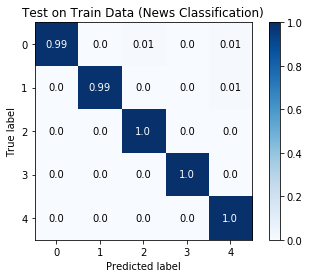

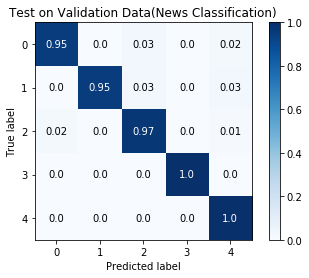

In [33]:
#(4) Accuracy measure & Plot  (Confusion Matrix)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Train_Y, y_train_predict,
                                    title = "Test on Train Data (News Classification)",  
                                    normalize=True)                         #pip install scikit-plot
skplt.metrics.plot_confusion_matrix(Test_Y, y_test_predict,title ="Test on Validation Data(News Classification)", normalize=True)

In [34]:
name = input("Enter a name: ")
print(name)

Enter a name: This is a technology
This is a technology


In [35]:
example_sent = name.lower()
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(example_sent)


  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  
print('\nTokenize :', word_tokens,'\n') 


Tokenize : ['this', 'is', 'a', 'technology'] 



In [36]:
lemmatizer = WordNetLemmatizer()

lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in filtered_sentence])
print(lemmatized_output)

#ps = PorterStemmer()

stem = []
for w in filtered_sentence:
    stem.append(lemmatizer.lemmatize(w))
    print(w, " : ", lemmatizer.lemmatize(w)) 

technology
technology  :  technology


In [37]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,Train_Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
le=preprocessing.LabelEncoder()
le.fit(stem)
test=le.transform(stem)
test.shape

(1,)

In [39]:
test=np.array(test)
tt=test.reshape(1,-1)

#t=Naive.predict(tt)
print(tt)
#print(y)
tt.shape


[[0]]


(1, 1)

In [41]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,Train_Y)
#MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
#clf.predict(tt)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
result = clf.predict(tt)
if(result == 0):
    print("Business")
elif(result == 1):
    print("Entertainment")
elif(result == 2):
    print("Political")
elif(result == 3):
    print("Sport")
elif(result == 4):
    print("Technology")
else: print("wrong")

ValueError: shapes (1,1) and (21882,5) not aligned: 1 (dim 1) != 21882 (dim 0)

# Prepare Train and Test Data sets

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(News['text_final'],News['type'],test_size=0.3)

# Encoding

In [ ]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
#Test_Y
print(Train_Y)

In [ ]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
print("Recall Score -> ",recall_score(predictions_NB, Test_Y, average="macro")*100)
print("Precision Score -> ",precision_score(predictions_NB, Test_Y, average="macro")*100)
print("F1 Score -> ",f1_score(predictions_NB, Test_Y, average="macro")*100)

#predictions_NB